En este notebook lo que voy a hacer es ir probando la introducción de nuevas variables en el modelo para intentar mejorar la capacidad explicativa del mismo. La incorporación de variables las hago previamente con R, exporto las tablas resultantes a archivos csv y finalmente las importo aquí. 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


We upload the train and test data

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving var_month_X_test_201701_201709.csv to var_month_X_test_201701_201709.csv
Saving var_month_X_train_2014_2016.csv to var_month_X_train_2014_2016.csv
Saving var_month_y_test_201701_201709.csv to var_month_y_test_201701_201709.csv
Saving var_month_y_train_2014_2016.csv to var_month_y_train_2014_2016.csv
User uploaded file "var_month_X_test_201701_201709.csv" with length 117985 bytes
User uploaded file "var_month_X_train_2014_2016.csv" with length 476684 bytes
User uploaded file "var_month_y_test_201701_201709.csv" with length 18776 bytes
User uploaded file "var_month_y_train_2014_2016.csv" with length 75131 bytes


In [3]:
!ls

sample_data


In [2]:
#X_train = pd.read_csv("X_train_lite.csv")
#y_train = pd.read_csv("y_train_lite.csv")

X_train = pd.read_csv("train_test_csvs/var_month_X_train_2014_2016.csv")
y_train = pd.read_csv("train_test_csvs/var_month_y_train_2014_2016.csv")

#X_train = pd.read_csv("X_train_2009_2016.csv")
#y_train = pd.read_csv("y_train_2009_2016.csv")

X_test = pd.read_csv("train_test_csvs/var_month_X_test_201701_201709.csv")
y_test = pd.read_csv("train_test_csvs/var_month_y_test_201701_201709.csv")

#X_test = pd.read_csv("X_test.csv")
#y_test = pd.read_csv("y_test.csv")

In [3]:
X_train.head()

,hour,week_day,month,pm10_1,pm10_2,pm10_3,pm10_4
0,4,3,1,21,16,20,22
1,5,3,1,14,21,16,20
2,6,3,1,14,14,21,16
3,7,3,1,12,14,14,21
4,8,3,1,9,12,14,14


In [6]:
X_test.head()

,hour,week_day,month,pm10_1,pm10_2,pm10_3,pm10_4
0,4,7,1,36,35,38,46
1,5,7,1,31,36,35,38
2,6,7,1,22,31,36,35
3,7,7,1,32,22,31,36
4,8,7,1,21,32,22,31


In [8]:
X_train.hour = X_train.hour.astype(str)
X_test.hour = X_test.hour.astype(str)


X_train.week_day = X_train.week_day.astype(str)
X_test.week_day = X_test.week_day.astype(str)

X_train.month = X_train.month.astype(str)
X_test.month = X_test.month.astype(str)

AttributeError: 'DataFrame' object has no attribute 'hour'

One hot encoding

In [0]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [4]:
# We select the categorical variables

X_train = X_train.select_dtypes(include=[object])
X_train.head()


""
0
1
2
3
4


In [23]:
X_test= X_test.select_dtypes(include=[object])
X_test.head()

,hour,week_day,month
0,4,7,1
1,5,7,1
2,6,7,1
3,7,7,1
4,8,7,1


In [24]:
X_train.columns

Index(['hour', 'week_day', 'month'], dtype='object')

In [0]:
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
LE = preprocessing.LabelEncoder()


In [27]:
# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_train = X_train.apply(LE.fit_transform)
X_train.head()

,hour,week_day,month
0,18,2,0
1,19,2,0
2,20,2,0
3,21,2,0
4,22,2,0


In [30]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_train)

# 3. Transform
onehotlabels = enc.transform(X_train).toarray()
onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

(25768, 43)

In [32]:
onehotlabels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
y_train.head()

,pm10_0
0,14
1,14
2,12
3,9
4,8


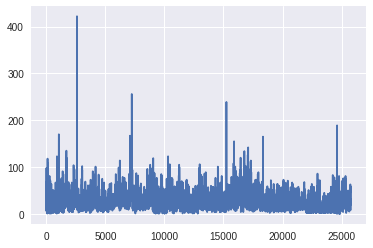

In [59]:
plt.plot(y_train["pm10_0"]);

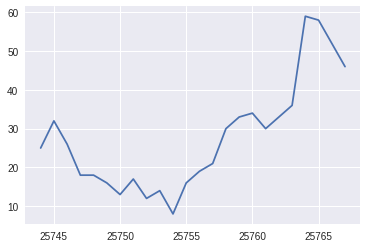

In [60]:
plt.plot(y_train["pm10_0"].iloc[-24:]);

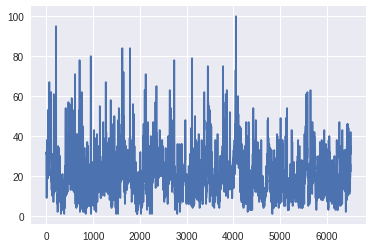

In [61]:
plt.plot(y_test["pm10_0"]);

Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


R^2: 0.5970275370978266
Root Mean Squared Error: 6.9369638508409635
[3.70469579]
[[ 0.05617296 -0.0893794   0.05011101  0.59708969  0.13530421  0.03738069
   0.05551121]]


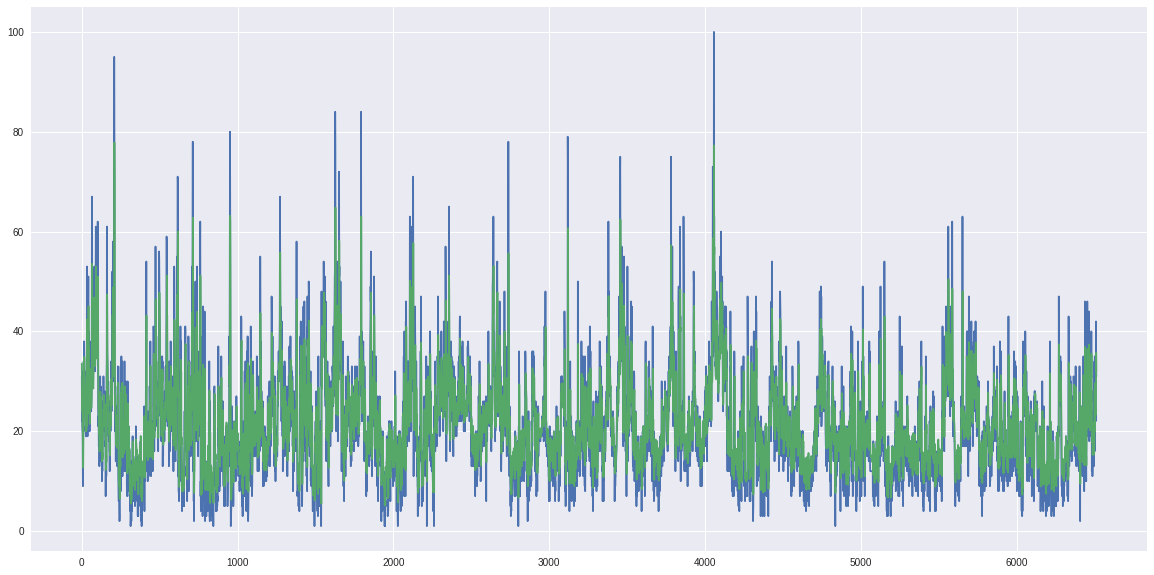

In [62]:
regLR = LinearRegression()

regLR.fit(X_train, y_train)

y_pred = regLR.predict(X_test)

plt.figure(figsize=(20,10))
plot(y_test)
plot(y_pred)

# Compute and print R^2 and RMSE
print("R^2: {}".format(regLR.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
#print('Variance score: %.2f' % r2_score(y_test, y_pred))

# print the coefficients
print(regLR.intercept_)
print(regLR.coef_)

El resultado sin la variable hour era:

R^2: 0.5873687035630151

Root Mean Squared Error: 6.92329678891284

[4.19883254]
[[0.59870982 0.13730629 0.03928065 0.05459173]]

Con ella pasamos a:

R^2: 0.596421091983793

Root Mean Squared Error: 6.942181708937056

[3.6373423]
[[0.05597813 0.5977527  0.13561775 0.03765512 0.0558966 ]]

Añadiendo el día de la semana. Apenas mejora: 

R^2: 0.5969256398069702

Root Mean Squared Error: 6.937840850151259

[4.01119355]
[[ 0.05600794 -0.08953865  0.59743803  0.13547303  0.03753261  0.05581124]]


Añadimos la variable month. Se mueve incluso menos:

R^2: 0.5970275370978266

Root Mean Squared Error: 6.9369638508409635

[3.70469579]
[[ 0.05617296 -0.0893794   0.05011101  0.59708969  0.13530421  0.03738069
   0.05551121]]





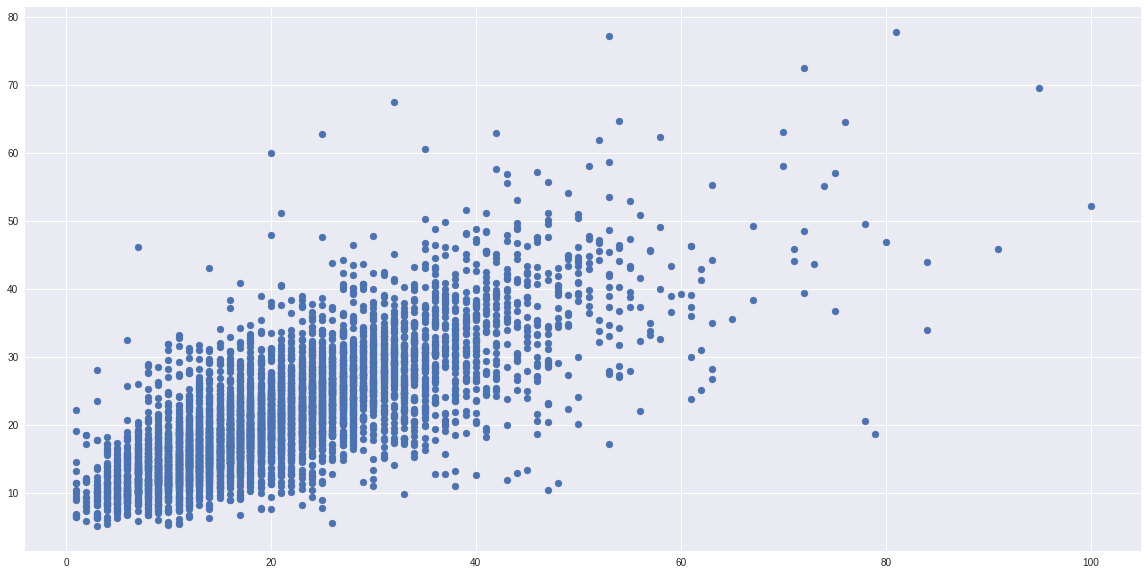

In [63]:
y_pred = y_pred.astype(float)
y_test = pd.DataFrame(y_test)
y_test = y_test.values
y_pred = pd.DataFrame(y_pred)
plt.figure(figsize=(20,10))
plt.scatter(x = y_test, y = y_pred)

Random Forest Regressor
Intentamos ver si el algoritmo Random Forest mejora estos resultados con más variables.

mirar la parte de make_regression https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
regRFR = GridSearchCV(RandomForestRegressor(n_estimators=1000,min_samples_leaf=1,max_depth=4),
                   param_grid={"min_samples_leaf":[10,20,30,40,70,100],
                              "max_depth":range(2,10)},
                  scoring="neg_mean_squared_error")

#regRFR = RandomForestRegressor(max_depth=9, 
 #                              min_samples_leaf=30,
  #                             random_state=42,
   #                            n_estimators=1000)

regRFR.fit(X_train,y_train.values.ravel())
print(regRFR.best_params_)
print(regRFR.best_score_)
print(np.sqrt(-regRFR.best_score_))

{'max_depth': 9, 'min_samples_leaf': 30}
-85.36797236260361
9.239479009262569


Resultados Random Forest 
4 lagged variables + month + week_day + hour

n_estimators=100
{'max_depth': 9, 'min_samples_leaf': 30}
-85.47385287742142
9.245207021880116

R cuadrado = 0.6062264792325871

RMSE = 6.857329227346121

Resultados Random Forest con 1000 estimators
Apenas diferencias

4 lagged variables + month + week_day + hour
n_estimators = 1000

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=30, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
           
R cuadrado test = 0.6073057266519202
RMSE test = 6.847925556953355


Resultados Random Forest con 1000 estimators y gridsearchcv

R cuadrado test =0.6074454058140306

RMSE test = 6.84670756417808

R cuadrado train = 0.6562618677566963
RMSE train = 8.782858408341056


In [0]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [14]:
y_pred = regRFR.predict(X_test)
print(r2_score(y_test, y_pred))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.6074454058140306
6.84670756417808


In [16]:
y_pred = regRFR.predict(X_train)
print(r2_score(y_train, y_pred))
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
print(rmse)

0.6562618677566963
8.782858408341056


In [11]:
{'max_depth': 5, 'min_samples_leaf': 10}
-70.93701309322749
8.422411358585348

8.422411358585348

          Resultados random forest train_lite

GridSearchCV(RandomForestRegressor(n_estimators=100,min_samples_leaf=1,max_depth=4),
                   param_grid={"min_samples_leaf":[10,20,30,40,70,100],
                              "max_depth":range(2,10)},
                   scoring="neg_mean_squared_error")

{'max_depth': 5, 'min_samples_leaf': 10}
-70.93701309322749
8.422411358585348

r2_score(y_test, y_pred) = 0.5807987069937522

con n_estimators = 1000

-70.93701309322749
8.422411358585348

r2_score(y_test, y_pred) = 0.5808991816442846

         Resultados con train 2014 - 2016 (n_estimators = 100)

{'max_depth': 8, 'min_samples_leaf': 10}
-70.86624571321295
8.418209174950034

 r2_score(y_test, y_pred) = 0.5754271936189217

        Resultados con train 2014 - 2016 (n_estimators = 1000)

{'max_depth': 5, 'min_samples_leaf': 10}
-70.84835957521966
8.417146759752955



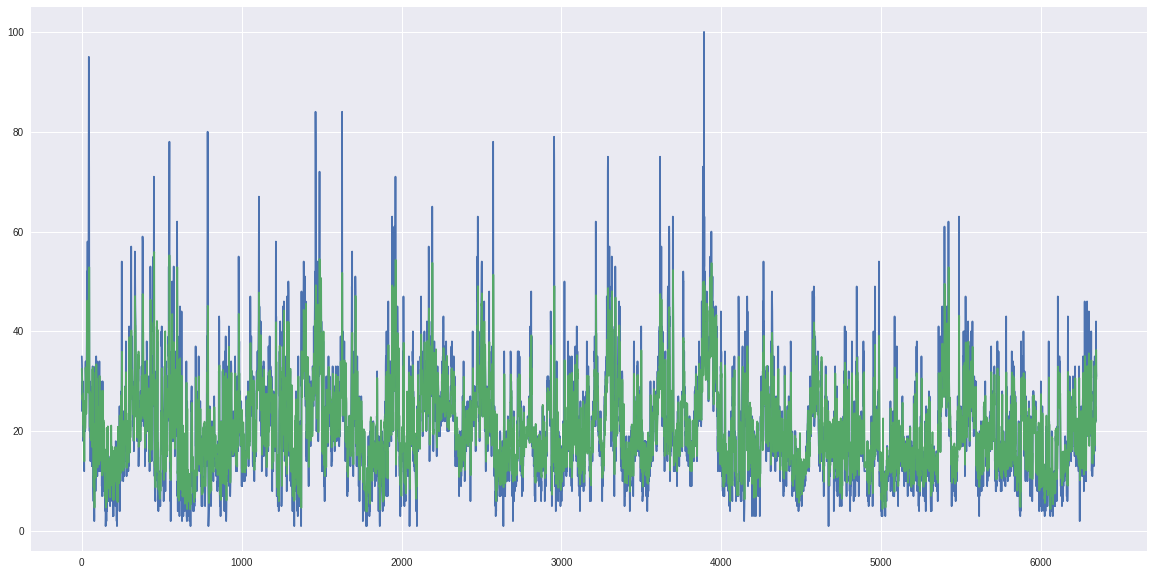

In [0]:
plt.figure(figsize=(20,10))
plot(y_test)
plot(y_pred)

In [0]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(regRFR.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
#print('Variance score: %.2f' % r2_score(y_test, y_pred))


R^2: -48.69522176015445
Root Mean Squared Error: 6.978196168076278


AttributeError: ignored

SyntaxError: ignored

Reduction of variables

Probamos  con las 6 primeras variables.

In [0]:
X_train = X_train[X_train.columns[0:4]]
X_test = X_test[X_test.columns[0:4]]

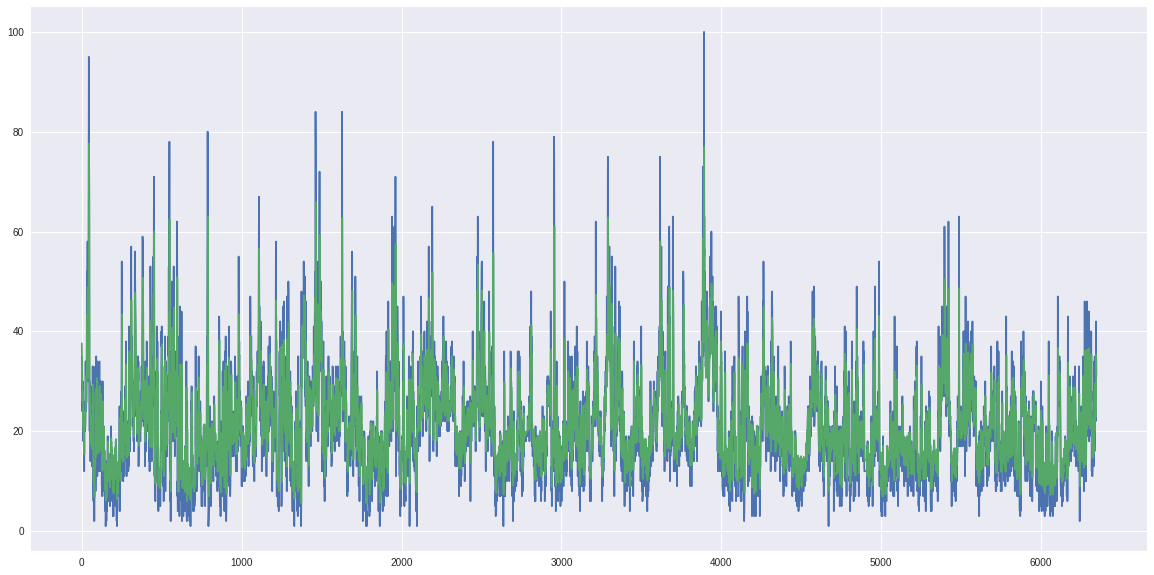

In [0]:
regLR = LinearRegression()
regLR.fit(X_train, y_train)
y_pred = regLR.predict(X_test)
plt.figure(figsize=(20,10))
plot(y_test)
plot(y_pred)

In [0]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(regLR.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))
#print('Variance score: %.2f' % r2_score(y_test, y_pred))

# print the coefficients
print(regLR.intercept_)
print(regLR.coef_)

R^2: 0.5873687035630151
Root Mean Squared Error: 6.92329678891284
[4.19883254]
[[0.59870982 0.13730629 0.03928065 0.05459173]]


Resultados regresion lineal con train 2014-2016 y solo las 6 primeras variables lagged

Apenas hay diferencias con el modelo de 30 variables.

R^2: 0.5889628398895992
Root Mean Squared Error: 6.909910311364052
[3.93467102]
[[0.59569712 0.13497708 0.03328157 0.02881637 0.0207577  0.02705815]]

Con solo las 4 primeras. Apenas se mueve. 

R^2: 0.5873687035630151
Root Mean Squared Error: 6.92329678891284
[4.19883254]
[[0.59870982 0.13730629 0.03928065 0.05459173]]

Probamos a dejar solo las dos primeras. Es decir, los niveles de PM10 de las dos horas precedentes al valor que queremos predecir.

Las diferencias son muy pequeñas también. 

R^2: 0.5825291214207613
Root Mean Squared Error: 6.963778681133049
[4.78661913]
[[0.61635125 0.18972618]]

Si hacemos un modelo con una única variable, el valor de la hora precedente casi obtenemos un R cuadrado de 57%

R^2: 0.5693274409714437
Root Mean Squared Error: 7.073029471241542
[5.90722781]
[[0.76068138]]



En principio, viendo lo poco que aportan el resto de variables, voy a quedarme con sólo las 4 primeras. Tendré un modelo que en principio explica un menos de la variabilidad y con un error un poco mayor, pero mucho menos complejo, lo que me dará agilidad a la hora de procesar e ir probando la introducción de otras variables.

KNeighbors Regression

In [0]:
from sklearn.neighbors import KNeighborsRegressor
regKN = KNeighborsRegressor(n_neighbors=5)
from sklearn.model_selection import cross_val_score

In [0]:
regKN.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [0]:
y_pred = regKN.predict(X_test)

In [0]:
# MAE
cross_val_score(regKN,X_train,y_train,scoring="neg_mean_absolute_error").mean()

-6.938626222661831

In [0]:
# RMSE
np.sqrt(-cross_val_score(regKN,X_train,y_train,scoring="neg_mean_squared_error").mean())

9.998242656152394

In [0]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(regKN.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.41119432400473
Root Mean Squared Error: 9.935828886015193


In [0]:
!ls

gdrive	sample_data  X_test.csv  X_train_lite.csv  y_test.csv  y_train_lite.csv


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
regGS = GridSearchCV(KNeighborsRegressor(n_neighbors=1),
                   param_grid={"n_neighbors":range(1,50)},
                   scoring="neg_mean_squared_error")

In [0]:
regGS.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 50)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
np.sqrt(-regGS.best_score_)

9.61452092990897

In [0]:
regGS.best_params_

{'n_neighbors': 18}

In [0]:
y_pred = regGS.predict(X_test)

In [0]:
y_pred = pd.DataFrame(y_pred)

In [0]:
y_pred.head()

,0
0,39.722222
1,32.777778
2,30.611111
3,27.055556
4,24.000000


In [0]:

y_pred = y_pred.rename(columns={"0": "pm10_0"})


In [0]:
y_pred.columns = ['pm10_0']
y_pred = y_pred.astype(float)

In [0]:
y_pred.info()
y_pred.shape

<class 'pandas.core.frame.DataFrame'>
Index: 575 entries, 0 to 574
Data columns (total 1 columns):
pm10_0    575 non-null float64
dtypes: float64(1)
memory usage: 9.0+ KB


(575, 1)

In [0]:
y_test = y_test.astype(float)
y_test.info()
y_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 1 columns):
pm10_0    575 non-null float64
dtypes: float64(1)
memory usage: 4.6 KB


(575, 1)

In [0]:
print("R^2: {}".format(regGS.score(y_test, y_pred)))

ValueError: ignored

In [0]:
regGS.score(X_test, y_test)

-95.49161567364465

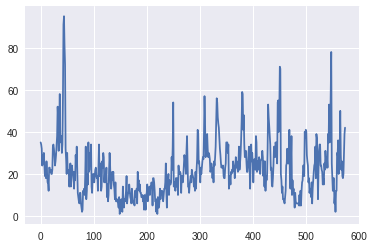

In [0]:
plot(y_test)

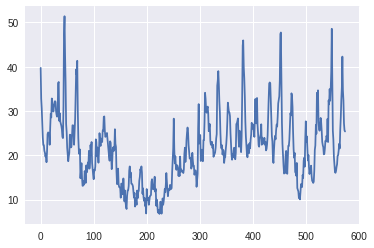

In [0]:
plot(y_pred)

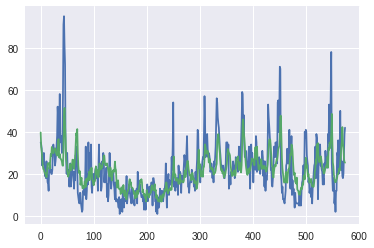

In [0]:
plot(y_test)
plot(y_pred)

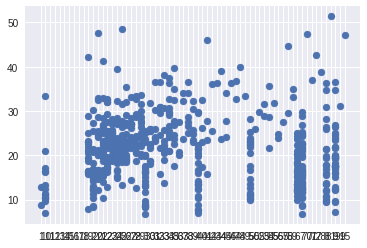

In [0]:
plt.scatter(y_test, y_pred)

In [0]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
regRFR = GridSearchCV(RandomForestRegressor(n_estimators=100,min_samples_leaf=1,max_depth=4),
                   param_grid={"min_samples_leaf":[10,20,30,40,70,100],
                              "max_depth":range(2,10)},
                   scoring="neg_mean_squared_error")
regRFR.fit(X_train,y_train)
print(regRFR.best_params_)
print(regRFR.best_score_)
print(np.sqrt(-regRFR.best_score_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 

{'max_depth': 5, 'min_samples_leaf': 10}
-71.22191115678358
8.439307504575455


In [0]:
y_pred = regRFR.predict(X_test)

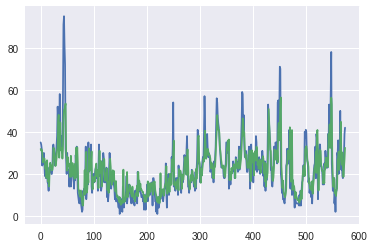

In [0]:
plot(y_test)
plot(y_pred)

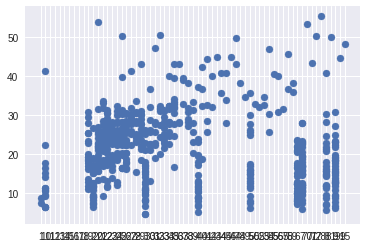

In [0]:
plt.scatter(y_test, y_pred)

In [0]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(regRFR.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -68.48079844564434
Root Mean Squared Error: 8.27531258899894


In [0]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

68.43043306104964
Root Mean Squared Error: 8.272268918564581


Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
regLR = GridSearchCV(LinearRegression(),
                   param_grid={},
                   scoring="neg_mean_squared_error")
regLR.fit(X_train,y_train)

print(regLR.best_params_)
print(regLR.best_score_)
print(np.sqrt(-regLR.best_score_))

{}
-80.78990942218464
8.988320723148714


XGBoost

In [0]:
from xgboost import XGBRegressor
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
regXGB = GridSearchCV(XGBRegressor(n_estimators=100, min_samples_leaf=1,max_depth=4),
                   param_grid={"min_samples_leaf":[10,20,30,40,70,100],
                              "max_depth":range(2,10)},
                   scoring="neg_mean_squared_error")
regXGB.fit(X_train,y_train)

print(regXGB.best_params_)
print(regXGB.best_score_)
print(np.sqrt(-regXGB.best_score_))
print(mean_absolute_error(y_test, y_pred))







{'max_depth': 2, 'min_samples_leaf': 10}
-71.49523980790217
8.455485781899355


NameError: ignored

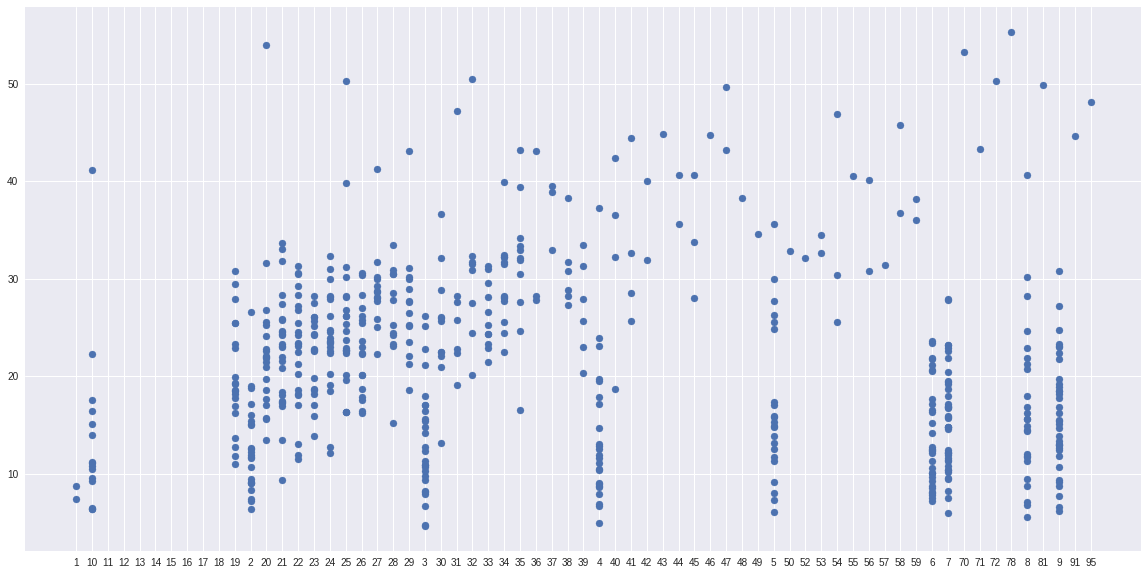

In [0]:
plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred)

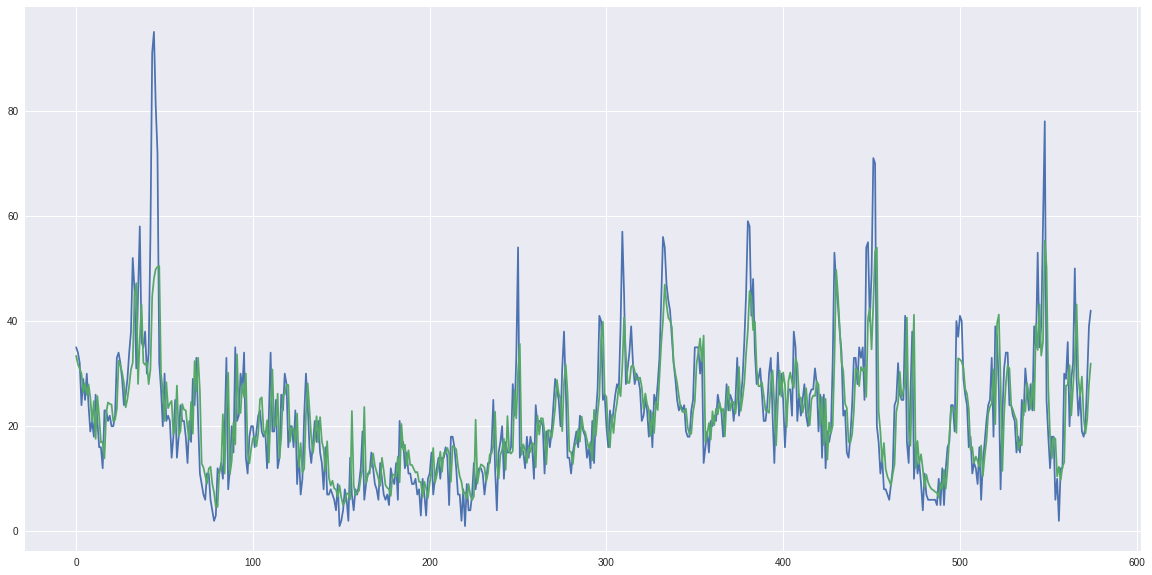

In [0]:
plt.figure(figsize=(20,10))
plot(y_test)
plot(y_pred)

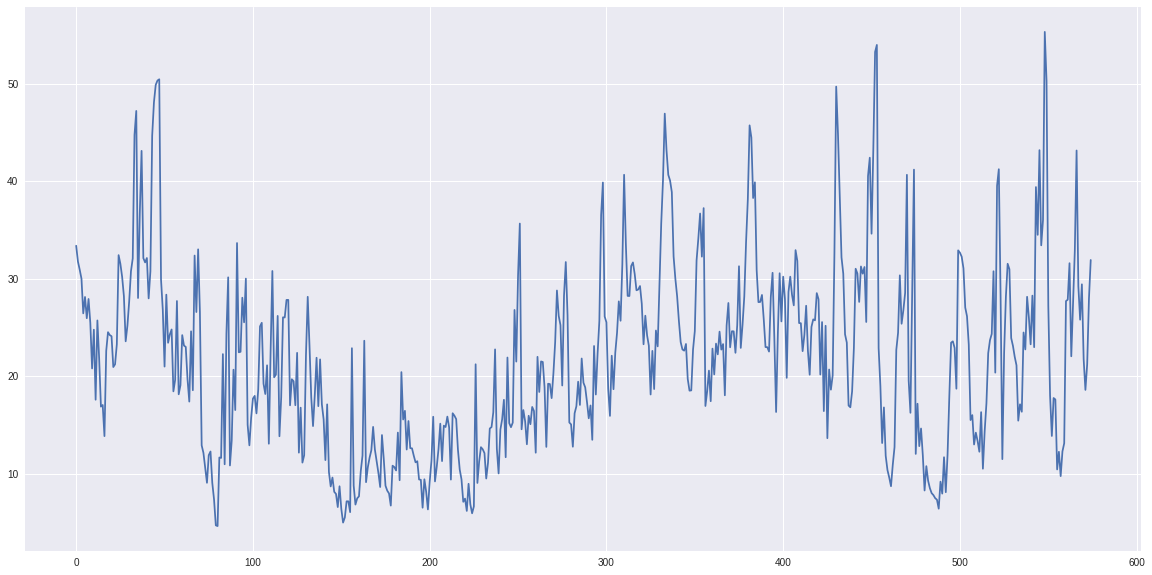